### Food Classification

Visualize results of training and testing on food images

To view your own results change the logfile and predictions definitions in the cell below

In [27]:
# To use your own results, change this to "data/train.log"
logfile = "data/old/train.log"

# To use your own results, change this to "data/train.log"
predictions = "data/predictions"

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import caffe
import os
import numpy as np
import sys
import seaborn as sns
import pandas as pd
import sklearn.metrics

sys.path.append("/usr/local/caffe/tools/extra")
import parse_log as pl

In [14]:
def get_metrics(real, predicted, labels):
    general_metrics = sklearn.metrics.precision_recall_fscore_support(real, predicted, labels=labels)
    metrics_table = pd.DataFrame.from_records(general_metrics, index=['Precision', 'Recall', 'F1-Score', 'Support'], columns=labels).T.round(2)
    confusion_matrix = sklearn.metrics.confusion_matrix(real, predicted, labels=labels)
    confusion_table = pd.DataFrame(confusion_matrix, index=labels, columns=labels)
    # Get overall metrics
    overall = {}
    overall["Accuracy"] = sklearn.metrics.accuracy_score(real, predicted)
    overall["Precision"] = sklearn.metrics.precision_score(real, predicted, average='weighted')
    overall["Recall"] = sklearn.metrics.recall_score(real, predicted, average='weighted')
    overall["F1"] = sklearn.metrics.f1_score(real, predicted, average='weighted')
    overall_metrics = pd.DataFrame(overall, index=['Results']).round(3)
    return overall_metrics, metrics_table, confusion_table

In [4]:
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s

import matplotlib.ticker as tkr
from matplotlib.ticker import FormatStrFormatter

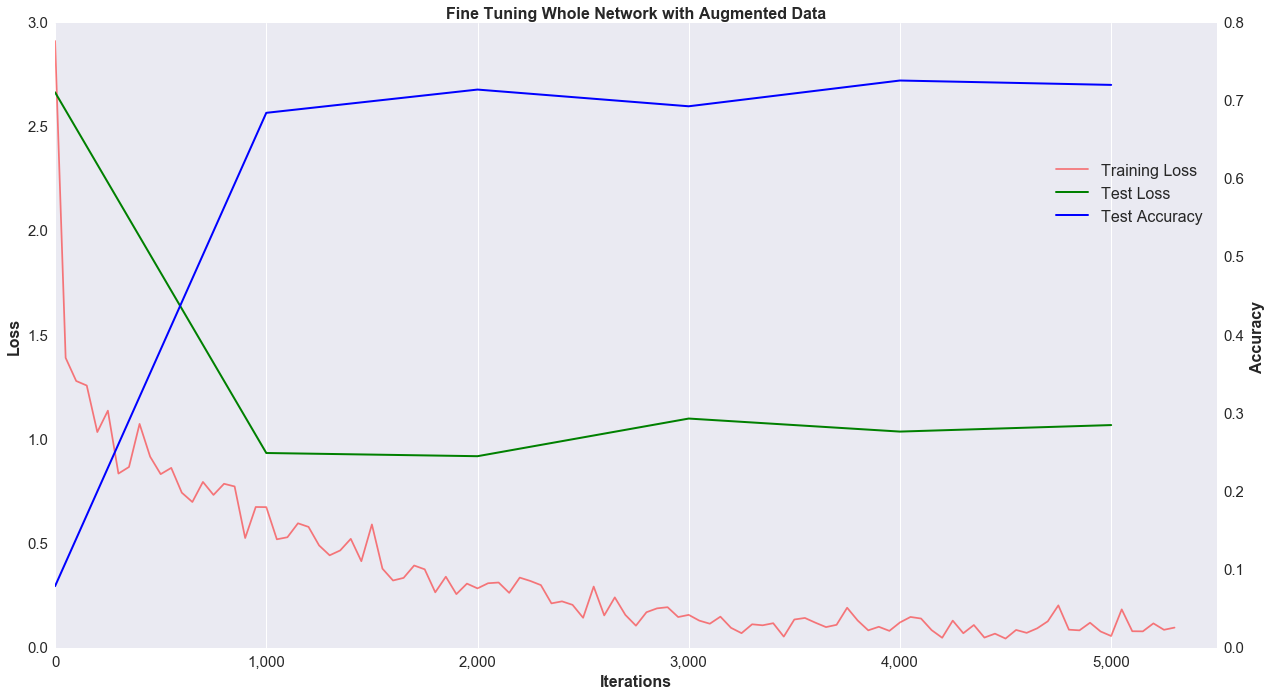

In [26]:
train_log, test_log = pl.parse_log(logfile)
train_iters = [x['NumIters'] for x in train_log]
train_loss = [x['loss'] for x in train_log]
test_iters = [x['NumIters'] for x in test_log]
test_loss = [x['loss'] for x in test_log]
test_accuracy = [x['accuracy'] for x in test_log]
fig, ax1 = plt.subplots(figsize=(18,10))

# Plotting training and test losses
train_l ,= ax1.plot(train_iters, train_loss, color='red',  alpha=.5, label='Training loss')
test_l ,= ax1.plot(test_iters, test_loss, linewidth=2, color='green', label='Test loss')
#ax1.set_ylim(ymin=0, ymax=200)
ax1.set_xlabel('Iterations', fontsize=16, weight='bold')
ax1.set_ylabel('Loss', fontsize=16, weight='bold')
ax1.tick_params(labelsize=15)
#Plotting test accuracy
ax2 = ax1.twinx()
test_acc ,= ax2.plot(test_iters, test_accuracy, linewidth=2, color='blue', label='Test accuracy')
#ax2.set_ylim(ymin=0, ymax=1)
ax2.set_ylabel('Accuracy', fontsize=16, weight='bold')
ax2.tick_params(labelsize=15)

ax1.set_xlim(0, 5500)
ax1.grid(b=False)
ax2.grid(b=False)
ax1.xaxis.grid(True)

x_format = tkr.FuncFormatter(func)
ax1.xaxis.set_major_formatter(x_format)
#Adding legend
plt.legend([train_l, test_l, test_acc], ['Training Loss', 'Test Loss', 'Test Accuracy'],  bbox_to_anchor=(1, 0.8), fontsize=16)
plt.title('Fine Tuning Whole Network with Augmented Data', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

In [7]:
# Get true classes
prediction_mapping = eval(open('data/class_mapping.txt', 'r').read())
reverse_prediction_mapping = { v:k for k,v in prediction_mapping.items() }
classes = [reverse_prediction_mapping[x] for x in range(12)]

true = []
labels = []
with open("data/test.txt", "r") as f:
    test_images = f.read().splitlines()

for x in test_images:
    labels.append(x.split(" ")[0])
    true.append(reverse_prediction_mapping[int(x.split(" ")[1])])

In [15]:
# Get predictions
predictions = np.load("data/old/predictions", encoding='latin1')

# Get true and predicted classes
predicted = []

for x in predictions:
    predicted.append(reverse_prediction_mapping[np.argmax(x)])

score, metrics, confusion = get_metrics(true, predicted, classes)
score

,Accuracy,F1,Precision,Recall
Results,0.751,0.749,0.755,0.751


In [16]:
metrics

,Precision,Recall,F1-Score,Support
pork_chop,0.70,0.54,0.61,200.0
lasagna,0.73,0.76,0.74,200.0
french_toast,0.72,0.71,0.72,200.0
guacamole,0.90,0.93,0.92,200.0
apple_pie,0.61,0.74,0.67,200.0
cheesecake,0.73,0.72,0.72,200.0
hamburger,0.76,0.86,0.80,200.0
fried_rice,0.71,0.92,0.80,200.0
carrot_cake,0.74,0.74,0.74,200.0
chocolate_cake,0.86,0.73,0.79,200.0


In [17]:
confusion

,pork_chop,lasagna,french_toast,guacamole,apple_pie,cheesecake,hamburger,fried_rice,carrot_cake,chocolate_cake,steak,pizza
pork_chop,108,19,12,0,11,2,12,13,1,0,21,1
lasagna,1,153,5,3,7,4,4,10,1,1,3,8
french_toast,4,7,142,2,18,6,12,3,3,0,1,2
guacamole,0,1,0,186,0,1,3,5,0,2,1,1
apple_pie,0,6,12,0,147,7,5,9,9,0,2,3
cheesecake,0,1,4,1,20,143,4,1,8,13,4,1
hamburger,1,1,6,2,5,6,171,1,1,1,5,0
fried_rice,2,0,0,5,3,0,1,185,3,0,0,1
carrot_cake,0,3,1,0,15,14,0,13,147,4,1,2
chocolate_cake,1,0,7,0,5,9,1,3,19,146,8,1


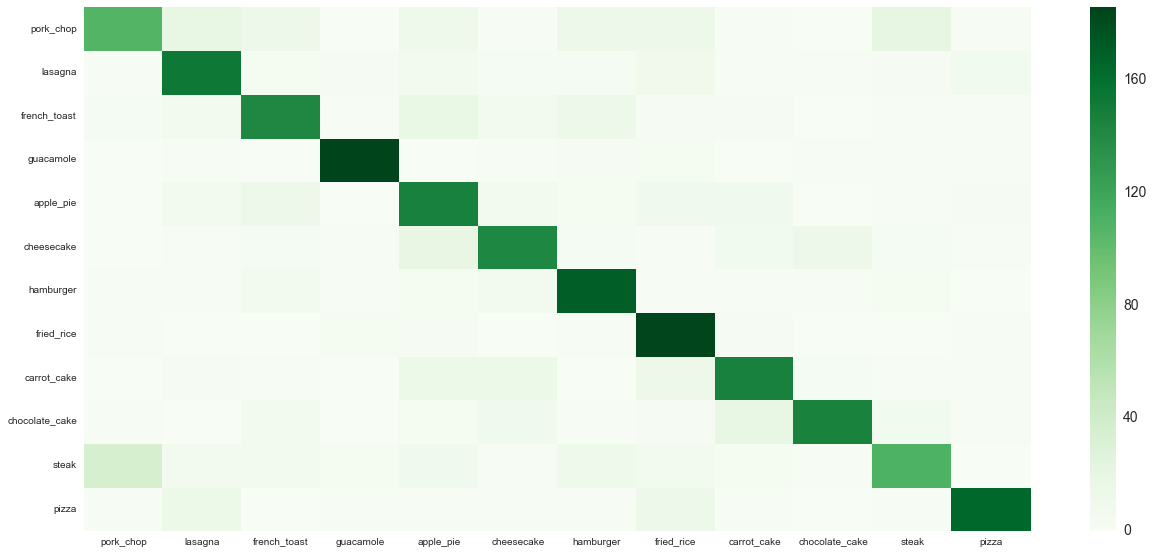

In [18]:
fig, ax = plt.subplots(figsize=(18,8))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion, cmap='Greens')
ax.set
fig.tight_layout()
plt.show()

### Per class Precision-Recall curves

In [19]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [20]:
y_probs = predictions
y_test = np.array(true)

In [21]:
precision = dict()
recall = dict()
average_precision = dict()
for i, c in enumerate(classes):
    t = (y_test == c).astype(int)
    s = y_probs[:, i]
    precision[c], recall[c], _ = precision_recall_curve(t, s)
    average_precision[c] = average_precision_score(t, s)

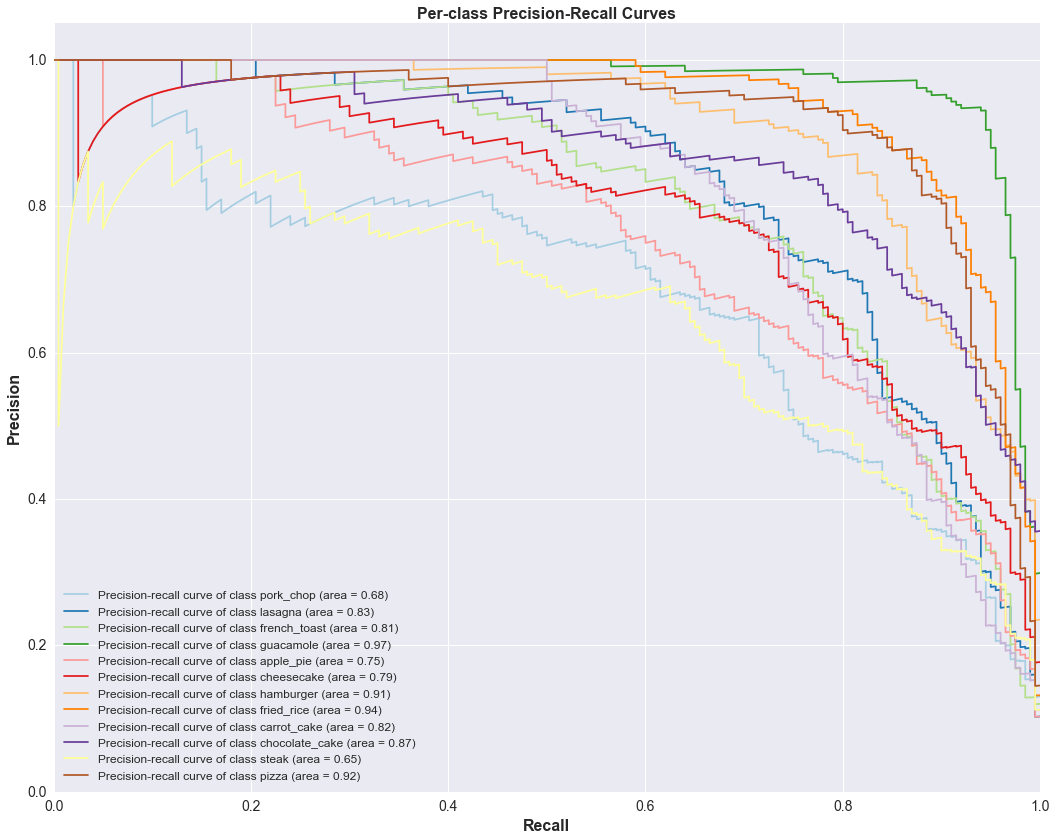

In [22]:
# Plot Precision-Recall curve for each class
colors = ('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928')
fig, ax = plt.subplots(figsize=(15,12))
#ax.set_axis_bgcolor('white')
for cl, co in zip(classes, colors):
    plt.plot(recall[cl], precision[cl], color=co,
             label='Precision-recall curve of class {} (area = {:.2f})'.format(cl, average_precision[cl]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', size=16, weight='bold')
plt.ylabel('Precision', size=16, weight='bold')
plt.title('Per-class Precision-Recall Curves', size=16, weight='bold')
plt.legend(loc="lower left", prop={'size':12})
fig.tight_layout()
plt.show()